In [ ]:
#ランダムフォレスト１回目

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


df=pd.read_excel('myoken0.xlsx', index_col='日時')
df=df[['損失水頭_3号', 'ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']]
df=df.interpolate(method='linear') #補間 #linear, time, index, values, nearest, zero, slinear, quadratic, cubic, barycentric, krogh, polynomial, spline, piecewise_polynomial, pchip #linear:値を等間隔に扱う、time:指定された長さの間隔を補間、index/values:インデックスの実際の数値、pad:既存の値を利用 #datetime型のindexの場合、indexが良い
df=df.rolling(7).mean() #移動平均 #Trueで中央に値を配置
df=df.dropna() #欠損値除去

x=df[['ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']] #入力値
y=df[['損失水頭_3号']] #出力値
x=(x-x.min())/(x.max()-x.min()) #正規化


In [2]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=False)

#ランダムフォレスト回帰

rf=RandomForestRegressor(n_estimators=300, 
                          criterion='squared_error', 
                          max_depth=5,
                          min_samples_split=2,
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=1.0, 
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                              bootstrap=True, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0,
                              warm_start=False, 
                              ccp_alpha=0.0,
                                max_samples=None)
#モデルの学習
rf.fit(x_train, y_train)

c:\Users\water\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, n_estimators=300)

In [3]:

#予測値train
y_train_pred=rf.predict(x_train)
#予測値test
y_test_pred=rf.predict(x_test)

print('RMSE 学習: %.2f, テスト: %.2f' %(
    mean_squared_error(y_train, y_train_pred, squared=False),
    mean_squared_error(y_test, y_test_pred, squared=False)
))

print('R^2 学習: %.2f, テスト: %.2f' %(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)
))

RMSE 学習: 0.14, テスト: 0.13
R^2 学習: 0.89, テスト: 0.92


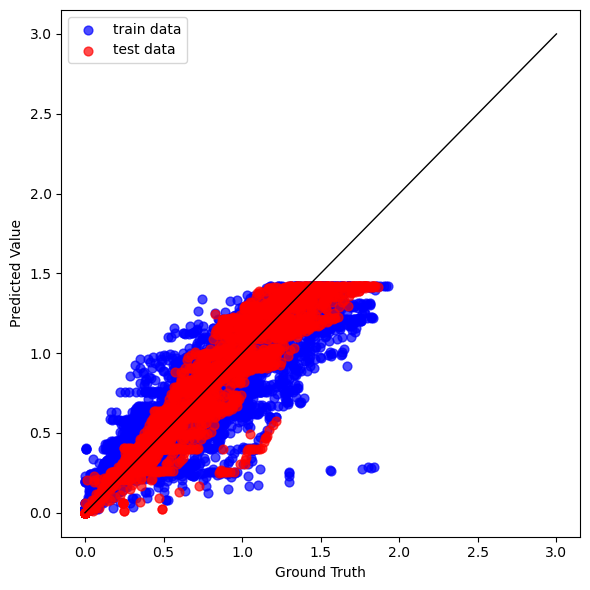

In [4]:
plt.figure(figsize=(6, 6))
plt.plot([0, 3], [0, 3], linewidth=1, c='black')
#予測値と実測値　学習データ
plt.scatter(y_train,
            y_train_pred,
            c='blue',
            marker='o',
            s=40,
            alpha=0.7,
            label='train data')

#予測値と実測値　テストデータ
plt.scatter(y_test,
            y_test_pred,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='test data')

#グラフ書式
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

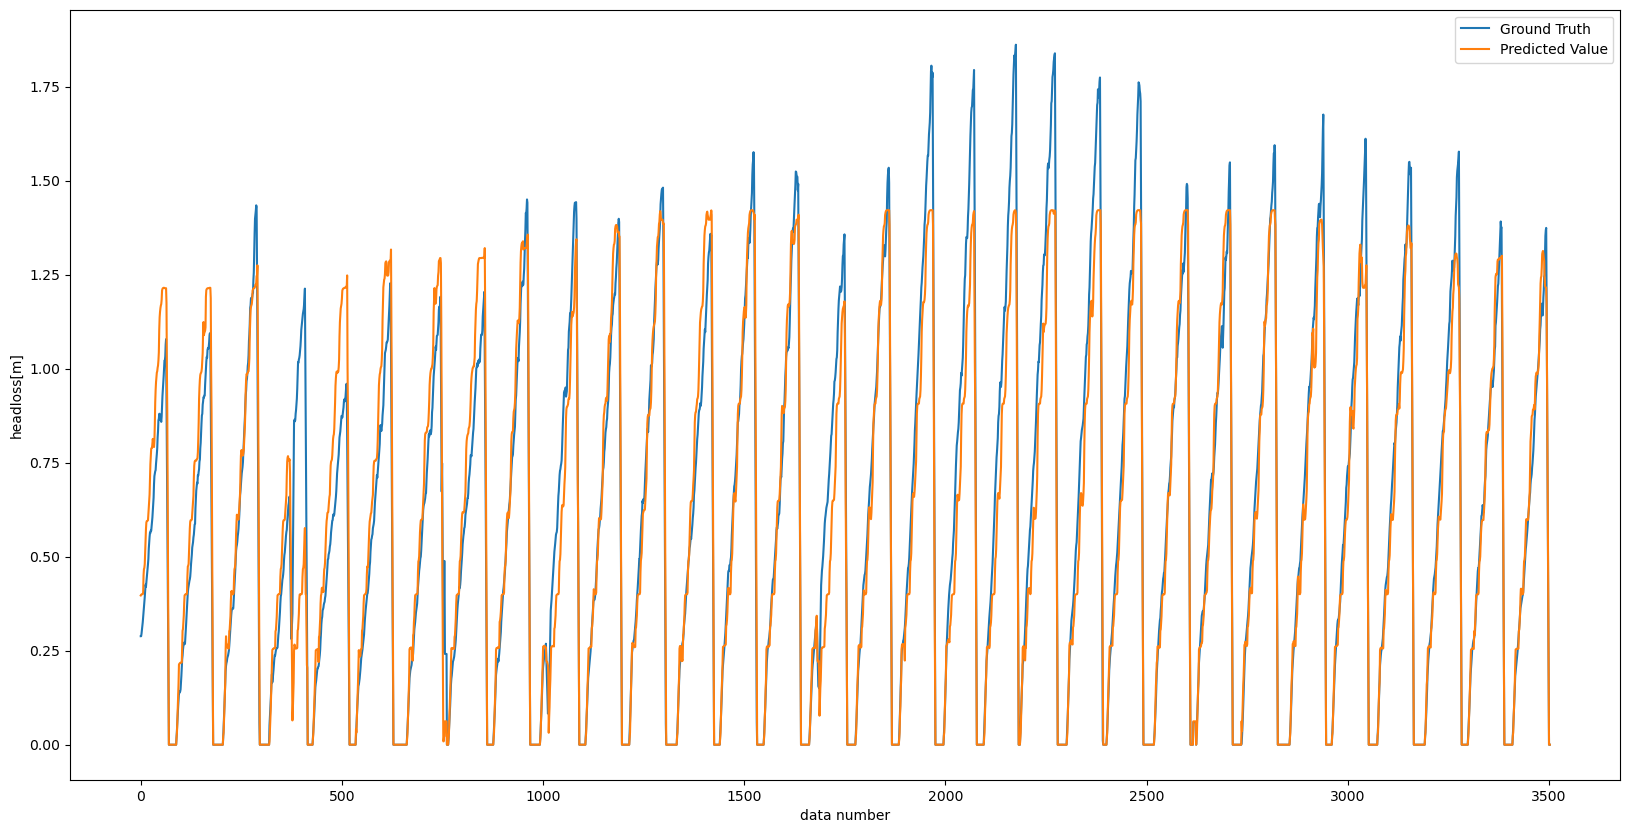

In [9]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Ground Truth")
plt.plot(y_test_pred, label="Predicted Value")
plt.legend()
plt.xlabel('data number')
plt.ylabel('headloss[m]')
plt.show()

In [20]:
#https://qiita.com/mychaelstyle/items/48238d70c7602ca14a0c
print(rf.feature_importances_)

[3.30777068e-03 2.54252791e-03 3.79104049e-04 1.79047245e-02
 7.39025615e-02 9.01963311e-01]


In [22]:
#csvファイルの中身
predict_df = pd.DataFrame()
predict_df['test'] = y_test
predict_df['pred'] = y_test_pred

#csvファイルに保存
predict_df.to_csv('./rf.csv', index=True)